## ニューラルネットワーク（NN）

- パーセプトロンの重みを自動で学習させるためのもの

画像はhttp://nkdkccmbr.hateblo.jp/entry/2016/10/06/222245
を使わせて頂くとするmm

図ch003-1:2層ニューラルネットワークの例
<img border="0" src="./images/neural_network.png" width="512" height="512" alt="イラスト1">

ニューラルネットワークの前に・・

前章の`def step_func(value, threshold):`は活性化関数といい、  
入力信号の総和に対する出力信号の出し方を決めている関数。  
ステップ関数以外にもいくつかの関数がある。

- シグモイド
- ReLU
- ソフトマックス

など

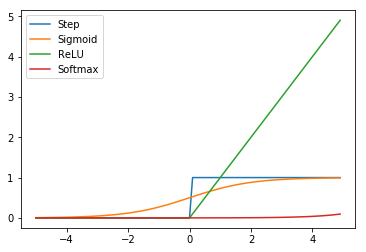

In [1]:
# 活性化関数を図字する
import numpy as np
import matplotlib.pylab as plt

#以下のインライン展開のコードを走らせないとmatplotlibのグラフ表示ができない場合がある
%matplotlib inline

def step(x):
  return np.array(x > 0, dtype=np.int)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def relu(x):
  return np.maximum(0, x)

def softmax(x):
  c = np.max(x)
  exp_x = np.exp(x - c)
  sum_exp_x = np.sum(exp_x)
  y = exp_x / sum_exp_x
  return y
    
# 横軸の範囲
x = np.arange(-5.0, 5.0, 0.1)
plot = (lambda func, label='': plt.plot( x, func, label=label ))
arr = [ [step(x), 'Step'], [sigmoid(x), 'Sigmoid'], [relu(x), 'ReLU'], [softmax(x), 'Softmax'] ]
[ plot(i[0], i[1]) for i in arr ]
plt.legend()

活性化関数の特性

- 非線形関数
- フィルタ的な役割
  大きな入力は大きく、小さな入力は小さくする

## 本題

ニューラルネットワークでは活性化関数に非線形関数を用いる必要がある。  
複数の層を使っても線形関数では意味がない。

In [2]:
# パーセプトロンの式(k=2)：
def perceptron(x1, x2, w1, w2):
    return linear(x1*w1 + x2*w2)

def linear(x):
  return 2*x

X = (lambda w1, w2: perceptron(0.5, 0.5, w1, w2))
print(X(1, 0))

1.0


In [3]:
# 2層
print( X( X(1, 1), X(1, 1) ) )
print( X( X(1, 1), X(1, 0) ) )

4.0
3.0


In [4]:
# 1層
print(X(2, 2))
print(X(2, 1))

4.0
3.0


線形関数だと何層にしたところで1層で重みなどを調整すれば同じ値を実現する事が出来る。

## NNの推論

推論では重みが学習済みのネットワークに対して入力ベクトルを入れて結果の分類などを行う。 

図ch003-2:3層ニューラルネットワーク  
(バイアスは図字されていない)

<img border="0" src="./images/neural_network_3layer.png" width="512" height="512" alt="イラスト1">

ニューラルネットワークの計算は行列計算出来る。  
入力、重みの行列から出力の行列を計算する。

In [5]:
# 第一層目に着目する
#   入力 x1=1, x2=2
#   重み w1=1, w2=2, w3=3, w4=4,w5=5, w6=6
#   バイアス h1=0.1, h2=0.2, h3=0.3
#   出力 a1, a2, a3を求める

X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
H = np.array([0.1, 0.2, 0.3])

In [6]:
# 行列の内積から出力aが求まる
A = np.dot(X, W) + H
a1 = A[0]
a2 = A[1]
a3 = A[2]
print(a1, a2, a3)

# 愚直に前章のように計算すると以下のようになる
a1 = X[0]*W[0][0] + X[1]*W[1][0] + H[0]
print(a1)

5.1 11.2 17.3
5.1


In [7]:
# シグモイド関数をAに対して適用する
Z = sigmoid(A)
print(Z)

[0.9939402  0.99998633 0.99999997]


という感じで入力、重み、バイアスから出力を計算し、活性化関数に入れる。  
値Zは次の層の入力として使用される。  
最終段(出力層)では活性化関数は解く問題の性質によって決める。

ソフトマックスは出力値を確率に変換してくれるので分類問題で利用する。

In [8]:
Z = softmax(A)
print(Z)

[5.01917302e-06 2.23783729e-03 9.97757144e-01]


## 要点

**ニューラルネットワークは行列で計算できる。**   

余談：  
行列計算のためにハードウェアアクセラレータはベクトル内積演算器とか行列乗算器を積んでいるんだろう。  
TPUのシストリックアレイは中身どうなっているんだろう。  
論文も（今更）暇な時に読んでみるか( ˘ω˘)ｽﾔｧ

https://drive.google.com/file/d/0Bx4hafXDDq2EMzRNcy1vSUxtcEk/view  
https://cloudplatform-jp.googleblog.com/2017/05/an-in-depth-look-at-googles-first-tensor-processing-unit-tpu.html